<a href="https://colab.research.google.com/github/itss-omkar/Coding-Ninjas/blob/main/Coding_ninjas_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

if uploaded:
  for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
else:
  print("No file was uploaded.")

Saving Employee_Performance_Retention.csv to Employee_Performance_Retention (2).csv
User uploaded file "Employee_Performance_Retention (2).csv" with length 352290 bytes


In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Employee_Performance_Retention.csv')

# Display the first few rows to confirm it loaded correctly
display(df.head())

,Employee_ID,Age,Department,Years_of_Experience,Monthly_Working_Hours,Training_Hours_per_Year,Performance_Rating,Job_Satisfaction_Level,Promotion_in_Last_2_Years,Attrition
0,E1000,59,Sales,27,135,30,3,Medium,Yes,No
1,E1001,49,Tech,13,132,36,5,Medium,Yes,Yes
2,E1002,35,Operations,16,197,11,5,Low,No,No
3,E1003,28,HR,23,204,36,3,High,No,No
4,E1004,41,Operations,33,192,36,2,Medium,No,No


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Define features & target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:01:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("🔹 XGBoost Results")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🔹 XGBoost Results
Accuracy: 0.8027777777777778
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1449
           1       0.00      0.00      0.00       351

    accuracy                           0.80      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.80      0.72      1800



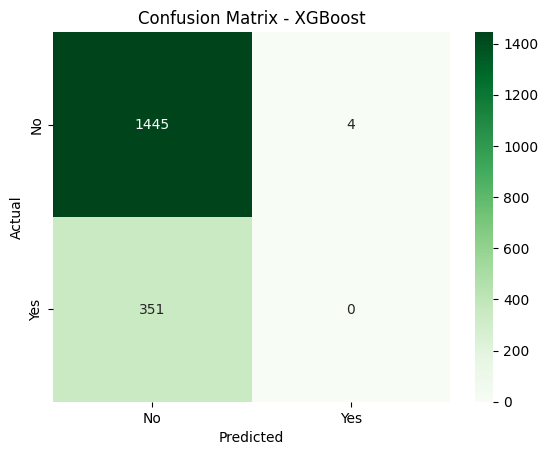

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

# Define base model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

In [ ]:
# Run GridSearchCV
grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           cv=3,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best CV Accuracy:", grid_search.best_score_)
print("⏱️ Tuning Time: %.2f seconds" % (end_time - start_time))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
✅ Best CV Accuracy: 0.8056944444444444
⏱️ Tuning Time: 31.83 seconds


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:01:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "XGBoost": xgb_model
}

comparison_results = []

for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    train_time = end_time - start_time

    comparison_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Training Time (s)": train_time
    })

    print(f"{name} Results - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, Time: {train_time:.2f}s")


🔹 Training Random Forest...
Random Forest Results - Accuracy: 0.8033, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Time: 1.67s

🔹 Training SVM (RBF)...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM (RBF) Results - Accuracy: 0.8050, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Time: 4.93s

🔹 Training XGBoost...
XGBoost Results - Accuracy: 0.8028, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Time: 0.20s


In [ ]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(comparison_results)
print("\n📊 Model Comparison:\n", results_df)


📊 Model Comparison:
            Model  Accuracy  Precision  Recall  F1 Score  Training Time (s)
0  Random Forest  0.803333        0.0     0.0       0.0           1.665483
1      SVM (RBF)  0.805000        0.0     0.0       0.0           4.930269
2        XGBoost  0.802778        0.0     0.0       0.0           0.204802


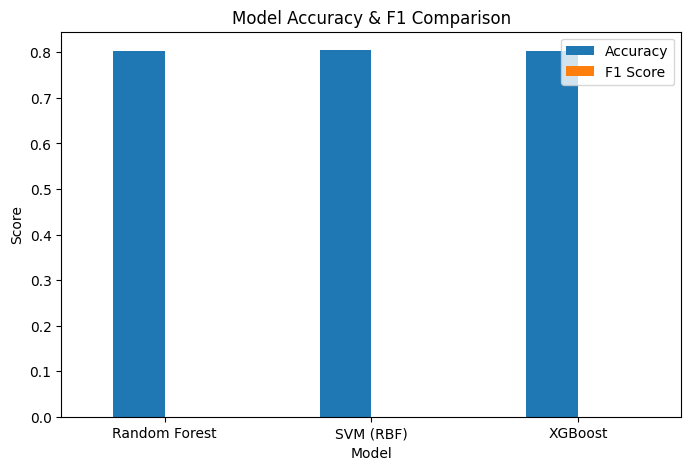

In [ ]:
# Plot comparison
results_df.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar", figsize=(8,5), rot=0)
plt.title("Model Accuracy & F1 Comparison")
plt.ylabel("Score")
plt.show()

<Figure size 800x600 with 0 Axes>

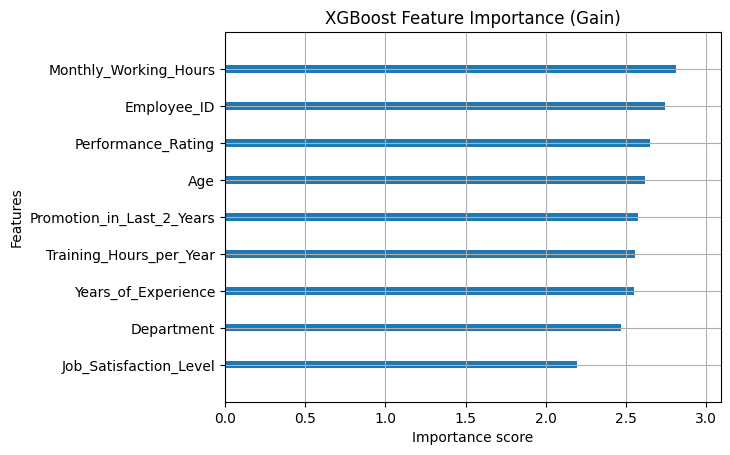

In [ ]:
# Plot feature importance for XGBoost
plt.figure(figsize=(8,6))
plot_importance(xgb_model, importance_type="gain", show_values=False)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()


In [ ]:
# Cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="accuracy")
print("✅ Mean CV Accuracy (XGBoost):", cv_scores.mean())

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:07] WARNING: /w

✅ Mean CV Accuracy (XGBoost): 0.6020000000000001
